In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mlt

In [2]:
df=pd.read_csv('titanic_numeric_dataset.csv')

In [3]:
df.shape

(10000, 4)

In [4]:
df.describe()

,fare,age,family,survived
count,10000.000000,9600.000000,8500.000000,10000.000000
mean,126.069056,39.886875,4.548471,0.379400
std,70.469337,22.846643,2.859066,0.485262
min,5.000000,1.000000,0.000000,0.000000
25%,65.355000,20.000000,2.000000,0.000000
50%,125.670000,40.000000,5.000000,0.000000
75%,186.305000,60.000000,7.000000,1.000000
max,249.930000,79.000000,9.000000,1.000000


In [5]:
df.isnull().sum()


fare           0
age          400
family      1500
survived       0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test ,y_train  , y_test = train_test_split(df.iloc[ :  ,0:3] , df.iloc[:, -1])

In [8]:
x_train

,fare,age,family
5964,123.55,72.0,NaN
2485,245.34,4.0,7.0
1095,48.25,14.0,NaN
3343,43.34,57.0,3.0
7630,124.71,29.0,5.0
...,...,...,...
7395,20.09,45.0,2.0
7000,14.51,2.0,5.0
1485,94.78,47.0,4.0
7779,131.96,73.0,NaN


In [9]:
x_train.isnull().mean()

fare      0.000000
age       0.037867
family    0.149467
dtype: float64

In [10]:
x_test.isnull().mean()

fare      0.0000
age       0.0464
family    0.1516
dtype: float64

# Filling the Missing values with mean median 

In [11]:
mean_fare = df['fare'].mean()
median_fare=df['fare'].median()

mean_age = df['age'].mean()
median_age=df['age'].median()

mean_family = df['family'].mean()
median_family=df['family'].median()

In [12]:
mean_fare, median_fare , mean_age

(np.float64(126.069056), np.float64(125.67), np.float64(39.886875))

In [13]:
x_train['mean_age']=x_train['age'].fillna(mean_age)
x_train['median_age']=x_train['age'].fillna(median_age)

x_train['mean_fare']=x_train['fare'].fillna(mean_fare)
x_train['median_fare']=x_train['fare'].fillna(median_fare)

x_train['mean_family']=x_train['family'].fillna(mean_family)
x_train['median_family']=x_train['family'].fillna(median_family)

In [14]:
x_train

,fare,age,family,mean_age,median_age,mean_fare,median_fare,mean_family,median_family
5964,123.55,72.0,NaN,72.0,72.0,123.55,123.55,4.548471,5.0
2485,245.34,4.0,7.0,4.0,4.0,245.34,245.34,7.000000,7.0
1095,48.25,14.0,NaN,14.0,14.0,48.25,48.25,4.548471,5.0
3343,43.34,57.0,3.0,57.0,57.0,43.34,43.34,3.000000,3.0
7630,124.71,29.0,5.0,29.0,29.0,124.71,124.71,5.000000,5.0
...,...,...,...,...,...,...,...,...,...
7395,20.09,45.0,2.0,45.0,45.0,20.09,20.09,2.000000,2.0
7000,14.51,2.0,5.0,2.0,2.0,14.51,14.51,5.000000,5.0
1485,94.78,47.0,4.0,47.0,47.0,94.78,94.78,4.000000,4.0
7779,131.96,73.0,NaN,73.0,73.0,131.96,131.96,4.548471,5.0


# disadvantage of mean/median filling is that it changes covariance , distribution and third one is that it creates outliers

In [15]:
# Age
print("Original Age variance:", x_train['age'].var())
print("After filling Age with mean variance:", x_train['mean_age'].var())
print("After filling Age with median variance:", x_train['median_age'].var())

# Fare
print("Original Fare variance:", x_train['fare'].var())
print("After filling Fare with mean variance:", x_train['mean_fare'].var())
print("After filling Fare with median variance:", x_train['median_fare'].var())

# Family
print("Original Family variance:", x_train['family'].var())
print("After filling Family with mean variance:", x_train['mean_family'].var())
print("After filling Family with median variance:", x_train['median_family'].var())


Original Age variance: 519.0294013419013
After filling Age with mean variance: 499.3730118130333
After filling Age with median variance: 499.3739975818998
Original Fare variance: 4949.827453204027
After filling Fare with mean variance: 4949.827453204027
After filling Fare with median variance: 4949.827453204027
Original Family variance: 8.215365505081422
After filling Family with mean variance: 6.987283538751473
After filling Family with median variance: 7.01247988620705


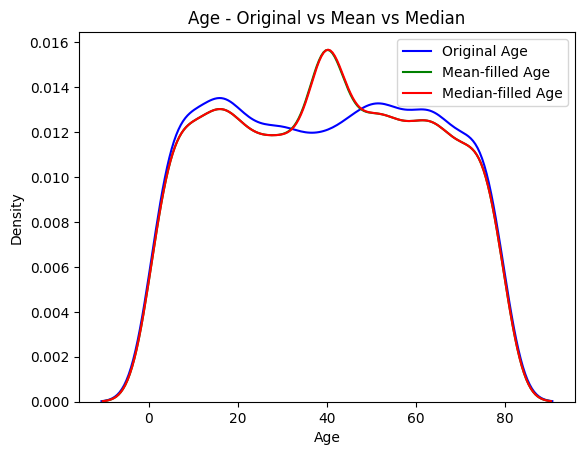

In [16]:
sns.kdeplot(x_train['age'].dropna(), label='Original Age', color='blue')
sns.kdeplot(x_train['mean_age'], label='Mean-filled Age', color='green')
sns.kdeplot(x_train['median_age'], label='Median-filled Age', color='red')

mlt.title("Age - Original vs Mean vs Median")
mlt.xlabel("Age")
mlt.ylabel("Density")
mlt.legend()
mlt.show()

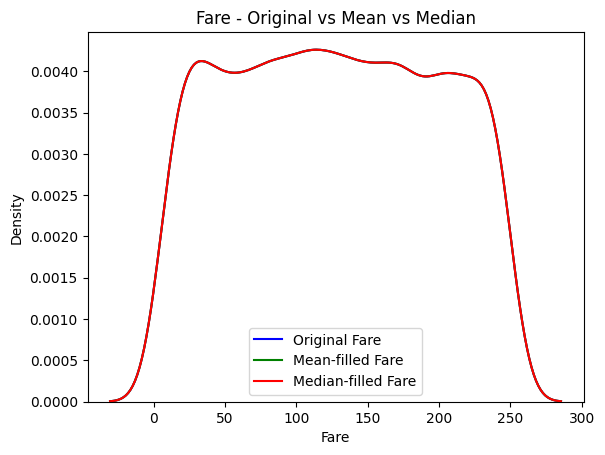

In [17]:
sns.kdeplot(x_train['fare'].dropna(), label='Original Fare', color='blue')
sns.kdeplot(x_train['mean_fare'], label='Mean-filled Fare', color='green')
sns.kdeplot(x_train['median_fare'], label='Median-filled Fare', color='red')
mlt.title("Fare - Original vs Mean vs Median")
mlt.xlabel("Fare")
mlt.ylabel("Density")
mlt.legend()
mlt.show()

#  visually we can see this medain/ mean technique is not useful for this column because it chages the distribution to high extinct

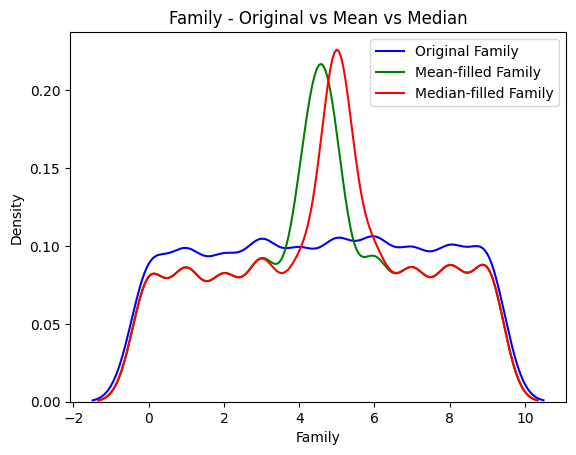

In [18]:
sns.kdeplot(x_train['family'].dropna(), label='Original Family', color='blue')
sns.kdeplot(x_train['mean_family'], label='Mean-filled Family', color='green')
sns.kdeplot(x_train['median_family'], label='Median-filled Family', color='red')
mlt.title("Family - Original vs Mean vs Median")
mlt.xlabel("Family")
mlt.ylabel("Density")
mlt.legend()
mlt.show()

### chekcing the covariance

In [19]:
x_train.cov()

,fare,age,family,mean_age,median_age,mean_fare,median_fare,mean_family,median_family
fare,4949.827453,-26.523763,-0.435169,-25.528810,-25.545952,4949.827453,4949.827453,-0.369333,-0.425406
age,-26.523763,519.029401,-0.008156,519.029401,519.029401,-26.523763,-26.523763,-0.006965,0.003202
family,-0.435169,-0.008156,8.215366,-0.007385,-0.006787,-0.435169,-0.435169,8.215366,8.215366
mean_age,-25.528810,519.029401,-0.007385,499.373012,499.373272,-25.528810,-25.528810,-0.006419,0.003396
median_age,-25.545952,519.029401,-0.006787,499.373272,499.373998,-25.545952,-25.545952,-0.005911,0.003962
mean_fare,4949.827453,-26.523763,-0.435169,-25.528810,-25.545952,4949.827453,4949.827453,-0.369333,-0.425406
median_fare,4949.827453,-26.523763,-0.435169,-25.528810,-25.545952,4949.827453,4949.827453,-0.369333,-0.425406
mean_family,-0.369333,-0.006965,8.215366,-0.006419,-0.005911,-0.369333,-0.369333,6.987284,6.986921
median_family,-0.425406,0.003202,8.215366,0.003396,0.003962,-0.425406,-0.425406,6.986921,7.012480


# checking Correlation 

In [20]:
x_train.corr()

,fare,age,family,mean_age,median_age,mean_fare,median_fare,mean_family,median_family
fare,1.000000,-0.016556,-0.002155,-0.016238,-0.016249,1.000000,1.000000,-0.001986,-0.002283
age,-0.016556,1.000000,-0.000124,1.000000,1.000000,-0.016556,-0.016556,-0.000116,0.000053
family,-0.002155,-0.000124,1.000000,-0.000115,-0.000105,-0.002155,-0.002155,1.000000,1.000000
mean_age,-0.016238,1.000000,-0.000115,1.000000,1.000000,-0.016238,-0.016238,-0.000109,0.000057
median_age,-0.016249,1.000000,-0.000105,1.000000,1.000000,-0.016249,-0.016249,-0.000100,0.000067
mean_fare,1.000000,-0.016556,-0.002155,-0.016238,-0.016249,1.000000,1.000000,-0.001986,-0.002283
median_fare,1.000000,-0.016556,-0.002155,-0.016238,-0.016249,1.000000,1.000000,-0.001986,-0.002283
mean_family,-0.001986,-0.000116,1.000000,-0.000109,-0.000100,-0.001986,-0.001986,1.000000,0.998150
median_family,-0.002283,0.000053,1.000000,0.000057,0.000067,-0.002283,-0.002283,0.998150,1.000000


<Axes: >

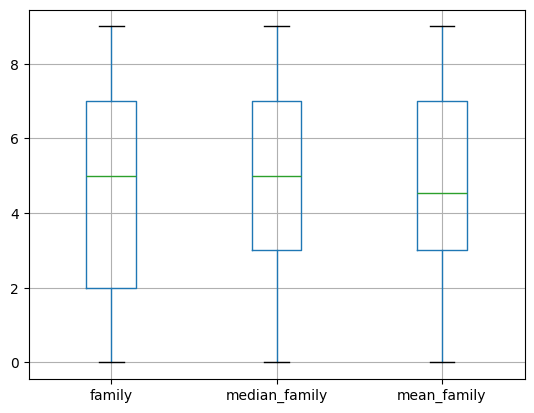

In [21]:
x_train[['family','median_family', 'mean_family']].boxplot()

In [22]:
x_train, x_test ,y_train  , y_test = train_test_split(df.iloc[ :  ,0:3] , df.iloc[:, -1])

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Applying three different Stratigies to different columns  using transformers 

In [24]:
imp1=SimpleImputer(strategy='mean')
imp2=SimpleImputer(strategy='median')
imp3=SimpleImputer(strategy='mean')

In [25]:
trans=ColumnTransformer([
    ('trans1', imp1, ['age']),
    ('trans2',imp2 , ['fare']),
    ('trans3',imp3 , ['family'])],
                       remainder='passthrough')

In [26]:
trans.fit(x_train)

,transformers,"[('trans1', ...), ('trans2', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [27]:
x_train=trans.transform(x_train)
x_test=trans.transform(x_test)

In [28]:
x_train 

array([[ 67.        ,  68.65      ,   5.        ],
       [ 26.        , 242.91      ,   2.        ],
       [ 28.        ,  16.53      ,   3.        ],
       ...,
       [  8.        ,  16.95      ,   0.        ],
       [ 73.        ,  21.29      ,   4.53940345],
       [ 70.        , 240.46      ,   0.        ]], shape=(7500, 3))

# Arbitrary Imputation (filling the missing value with a constant values)

In [44]:
mean_fare1 = df['fare'].fillna(1)
median_fare2=df['fare'].fillna(2)

mean_age0= df['age'].fillna(0)
median_age20=df['age'].fillna(20)

mean_family = df['family'].fillna(-1)
median_family=df['family'].fillna(-2)

In [45]:
median_fare.sample(10)

6323     93.06
9854    216.44
8693      7.96
813     230.61
4632    201.59
7381     47.82
3369    175.19
6486    237.87
4018     77.84
8118     47.07
Name: fare, dtype: float64

# we can use two techniques for categorical 1. most frequent(mode) and 2.specific value('missing') , can be done directly with fillna('missing') or with sklearn simpleImputer() as well 


In [62]:
df=pd.read_csv('train.csv' , usecols=['GarageQual', 'FireplaceQu','SalePrice'])


In [63]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [64]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

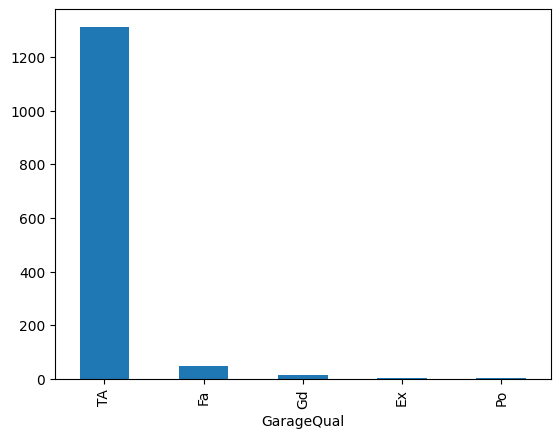

In [65]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [68]:
garage_mode=df['GarageQual'].mode()

In [71]:
df['GarageQual']=df['GarageQual'].fillna(garage_mode)

<Axes: xlabel='FireplaceQu'>

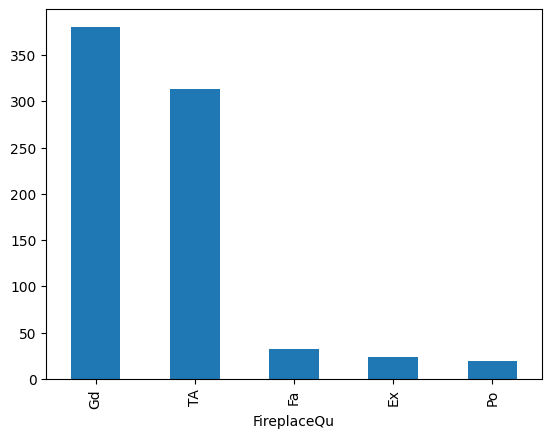

In [73]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [74]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test, y_train, y_test= train_test_split(df[['FireplaceQu','GarageQual']],df['SalePrice'] , test_size=0.2)

In [80]:
from sklearn.impute import  SimpleImputer

In [83]:
imp=SimpleImputer(strategy='most_frequent')

In [84]:
imp.fit(x_train)

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [85]:
imp.transform(x_train)
imp.transform(x_test)

array([['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'Ex'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'Fa'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['TA', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA',

<Axes: xlabel='GarageQual'>

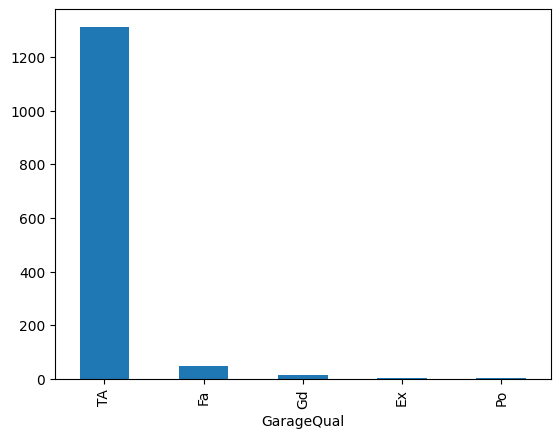

In [86]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [88]:
df['GarageQual']=df['GarageQual'].fillna('missing')

In [89]:
df['GarageQual']

0       missing
1       missing
2       missing
3       missing
4       missing
         ...   
1455    missing
1456    missing
1457    missing
1458    missing
1459    missing
Name: GarageQual, Length: 1460, dtype: object